# Гистограммы, разбиения по интервалам и плотность

Простая гистограмма может принести огромную пользу при первичном анализе набора данных. Ранее мы видели пример использования функции библиотеки Matplotlib для создания простой гистограммы в одну строку после выполнения всех обычных импортов.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
data = np.random.randn(1000)

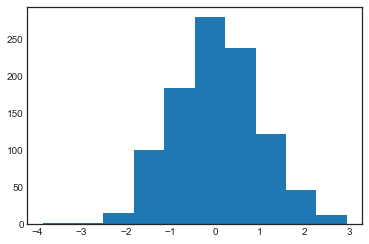

In [3]:
plt.hist(data);

У функции hist() имеется множество параметров для настройки как вычисления, так и отображения. Вот пример гистограммы с детальными пользовательскими настройками:

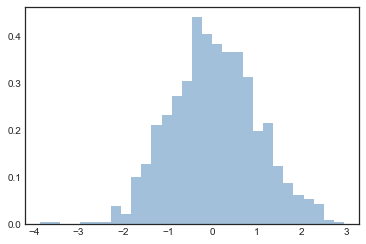

In [4]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

Docstring функции plt.hist содержит более подробную информацию о других доступных возможностях пользовательской настройки. Сочетание опции histtype='stepfilled' с заданной прозрачностью alpha представляется мне очень удобным для сравнения гистограмм нескольких распределений:

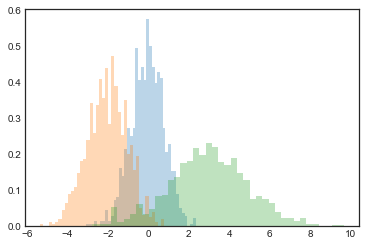

In [5]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Если же вам нужно вычислить гистограмму (то есть подсчитать количество точек в заданном интервале) и не отображать ее, к вашим услугам функция np.histogram():

In [6]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[  4 115 463 359  59]


## Двумерные гистограммы и разбиения по интервалам

Аналогично тому, как мы создавали одномерные гистограммы, разбивая последовательность чисел по интервалам, можно создавать и двумерные гистограммы, распределяя точки по двумерным интервалам. Рассмотрим несколько способов выполнения. Начнем с описания данных массивов x и y, полученных из многомерного Гауссова распределения:

In [7]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### Функция plt.hist2d: двумерная гистограмма

Один из простых способов нарисовать двумерную гистограмму — воспользоваться функцией plt.hist2d библиотеки Matplotlib:

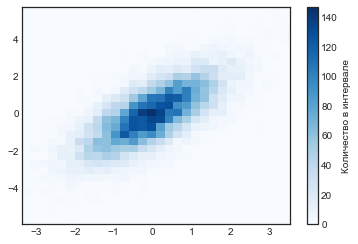

In [8]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Количество в интервале')

У функции plt.hist2d, как и у функции plt.hist, имеется немало дополнительных параметров для тонкой настройки графика и разбиения по интервалам, подробно описанных в ее docstring. Аналогично тому, как у функции plt.hist есть эквивалент np.histogram, так и у функции plt.hist2d имеется эквивалент np.histogram2d, который используется следующим образом:

In [9]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

Для обобщения разбиения по интервалам для гистограммы на число измерений, превышающее 2, см. функцию np.histogramdd.

### Функция plt.hexbin: гексагональное разбиение по интервалам

Двумерная гистограмма создает мозаичное представление квадратами вдоль координатных осей. Другая геометрическая фигура для подобного мозаичного представления — правильный шестиугольник. Для этих целей библиотека Matplotlib предоставляет функцию plt.hexbin — двумерный набор данных, разбитых по интервалам на сетке из шестиугольников:

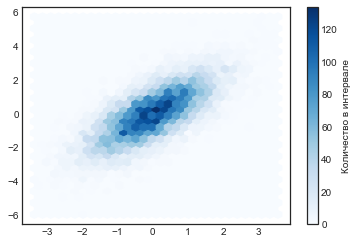

In [10]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='Количество в интервале')

У функции plt.hexbin имеется множество интересных параметров, включая возможность задавать вес для каждой точки и менять выводимое значение для каждого интервала на любой сводный показатель библиотеки NumPy (среднее значение весов, стандартное отклонение весов и т. д.).

## Ядерная оценка плотности распределения

Еще один часто используемый метод оценки плотностей в многомерном пространстве — ядерная оценка плотности распределения (kernel density estimation, KDE). Отметим, что KDE можно представлять как способ «размазать» точки в пространстве и сложить результаты для получения гладкой функции. В пакете scipy.stats имеется исключительно быстрая и простая реализация KDE. Вот короткий пример использования KDE на вышеуказанных данных:

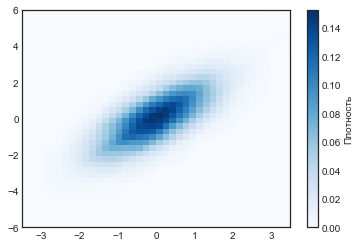

In [12]:
from scipy.stats import gaussian_kde

# Выполняем подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Вычисляем на регулярной координатной сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# выводим график результата в виде изображения
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('Плотность')

Длина сглаживания метода KDE позволяет эффективно выбирать компромисс между гладкостью и детализацией (один из примеров вездесущих компромиссов между смещением и дисперсией). Существует обширная литература, посвященная выбору подходящей длины сглаживания: в функции gaussian_kde используется эмпирическое правило для поиска квазиоптимальной длины сглаживания для входных данных.
В экосистеме SciPy имеются и другие реализации метода KDE, каждая со своими сильными и слабыми сторонами, например методы sklearn.neighbors.KernelDensity и statsmodels.nonparametric.kernel_density.KDEMultivariate. Использование библиотеки Matplotlib для основанных на методе KDE визуализаций требует написания излишнего кода. Библиотека Seaborn, которую мы будем обсуждать в разделе «Визуализация с помощью библиотеки Seaborn» данной главы, предлагает для создания таких визуализаций API с намного более сжатым синтаксисом.